<hr/>

# Predicting House Prices (Keras - Artificial Neural Network)
**(https://www.kaggle.com/tomasmantero)**
<hr/>

### Table of Contents
1. [Overview](#ch1)
1. [Dataset](#ch2)
1. [Exploratory Data Analysis](#ch3)
1. [Working with Feature Data](#ch4)
1. [Feature Engineering](#ch5)
1. [Scaling and Train Test Split](#ch6)
1. [Creating a Model](#ch7)
1. [Training the Model](#ch8)
1. [Evaluation on Test Data](#ch9)
1. [Predicting on a Brand New House](#ch10)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<a id="ch1"></a>
## Overview 
<hr/>

One of the objectives of this notebook is to **show step-by-step how analyzing the dataset to predict future home prices.** Moreover, we are going to explain most of the concepts used so that you understand why we are using them.
In base of features like sqft_living, bathrooms, bedrooms, view, and others, we are going to build a deep learning model that can predict future price houses. 





The following questions will be answered throughout the Kernel:
* ***Which features are available in the dataset?***
* ***Which features are categorical?***
* ***Which features are numerical?***
* ***Which features contain blank, null or empty values?***
* ***What are the data types for various features?***
* ***What is the distribution of numerical feature values across the samples?***
* ***Which features are more correlated to the price?***

<a id="ch2"></a>
## Dataset
<hr/>

* This dataset contains house sale prices for King County, which includes Seattle. 
* It includes homes sold between May 2014 and May 2015.
* 21 columns. (features)
* 21597 rows.

***Feature Columns***
    
* **id:** Unique ID for each home sold
* **date:** Date of the home sale
* **price:** Price of each home sold
* **bedrooms:** Number of bedrooms
* **bathrooms:** Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* **sqft_living:** Square footage of the apartments interior living space
* **sqft_lot:** Square footage of the land space
* **floors:** Number of floors
* **waterfront:** - A dummy variable for whether the apartment was overlooking the waterfront or not
* **view:** An index from 0 to 4 of how good the view of the property was
* **condition:** - An index from 1 to 5 on the condition of the apartment,
* **grade:** An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* **sqft_above:** The square footage of the interior housing space that is above ground level
* **sqft_basement:** The square footage of the interior housing space that is below ground level
* **yr_built:** The year the house was initially built
* **yr_renovated:** The year of the house’s last renovation
* **zipcode:** What zipcode area the house is in
* **lat:** Lattitude
* **long:** Longitude
* **sqft_living15:** The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15:** The square footage of the land lots of the nearest 15 neighbors

### Imports

In [2]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# scaling and train test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# creating a model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

# evaluation on test data
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score


### Acquire data
The Python Pandas packages helps us work with our datasets. We start by acquiring the datasets into Pandas DataFrames.

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Internship/kc_house_data.csv')

### Analyze by describing data
Pandas also helps describe the datasets answering following questions early in our project.

***Which features are available in the dataset?***

In [4]:
print(df.columns.values)

['id' 'date' 'price' 'bedrooms' 'bathrooms' 'sqft_living' 'sqft_lot'
 'floors' 'waterfront' 'view' 'condition' 'grade' 'sqft_above'
 'sqft_basement' 'yr_built' 'yr_renovated' 'zipcode' 'lat' 'long'
 'sqft_living15' 'sqft_lot15']


***Which features are categorical?***

These values classify the samples into sets of similar samples. Within categorical features are the values nominal, ordinal, ratio, or interval based? Among other things this helps us select the appropriate plots for visualization.

* Categorical: id, waterfront, zipcode.

***Which features are numerical?***

Which features are numerical? These values change from sample to sample. Within numerical features are the values discrete, continuous, or timeseries based? Among other things this helps us select the appropriate plots for visualization.

* Continous: price, bathrooms, floors, lat, long.
* Discrete: date, bedrooms, sqft_living, sqft_lot, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, sqft_living15, sqft_lot15.

In [5]:
# preview the data
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
# preview the data
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [7]:
df.shape

(21613, 21)

***Which features contain blank, null or empty values?***

We can check for missing values with pandas isnull(). This indicates whether values are missing or not. Then we can sum all the values to check every column. 

In [8]:
# No missing values
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

***What are the data types for various features?***

Five features are floats, fifteen are integers and one is an object.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

***What is the distribution of numerical feature values across the samples?***

In [10]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Assumtions based on data analysis

We arrive at following assumptions based on data analysis done so far. We may validate these assumptions further before taking appropriate actions.

### Correlating

We want to know how well does each feature correlate with Price. We want to do this early in our project and match these quick correlations with modelled correlations later in the project.

### Completing

Since there are no missing values we do not need to complete any values. 

### Correcting

Id feature may be dropped from our analysis since it does not add value.
Date feature may be dropped since we are going to do feature engineering and make a year and month column.
Zipcode feature is a special case, we could use it, but since we do not know exactly the zones of King County we are just going to drop it. 

### Creating

We may want to create a new feature called Year based on Date to analyze the price change throughout the years.
We may want to create a new feature called Month based on Date to analyze the price change throughout the months.

<a id="ch3"></a>
## Exploratory Data Analysis
<hr/>

### Analyze by visualizing data
Now we can continue confirming some of our assumptions using visualizations for analyzing the data.

<AxesSubplot:title={'center':'Correlation Matrix'}>

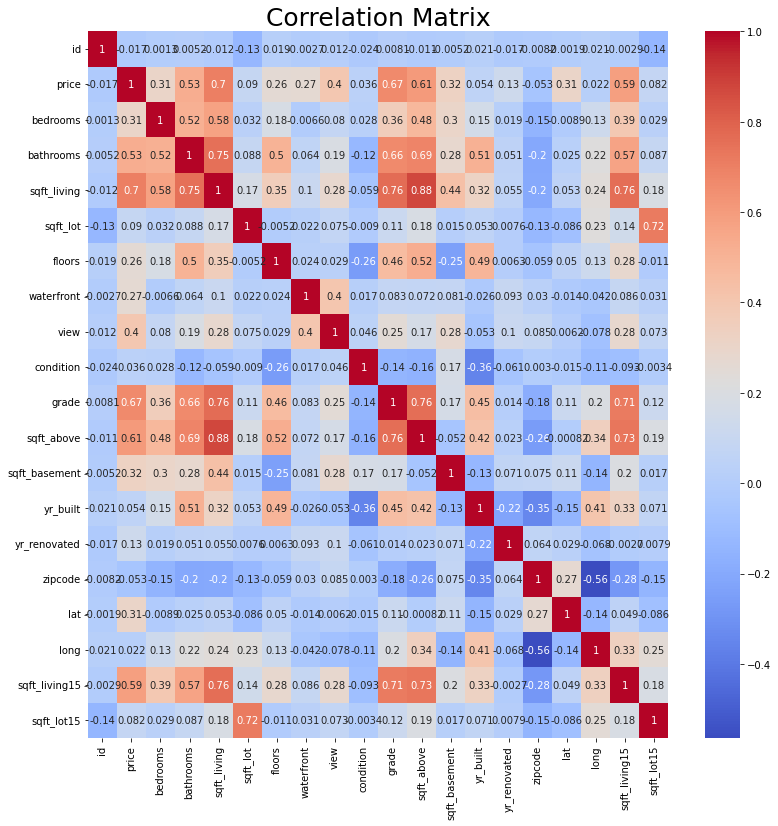

In [11]:

plt.figure(figsize=(13,13))
plt.title('Correlation Matrix',fontsize=25)

sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

### Price correlation
* This allow us to explore labels that are highly correlated to the price.
* sqft_living looks like a highly correlated label to the price, as well as grade, sqft_above, sqft_living15 and bathrooms.

***Which features are more correlated to the price?***

In [12]:
price_corr = df.corr()['price'].sort_values(ascending=False)
print(price_corr)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64


**ploting the graph for changes in the price to know at every month**

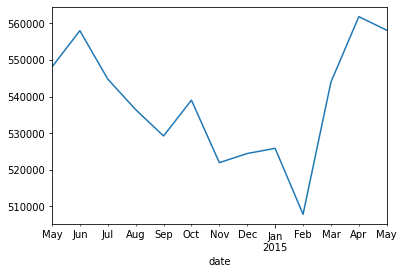

In [18]:
df['date'] = pd.to_datetime(df['date'])
df_monthly=df.groupby(pd.Grouper(key='date', freq='M')).mean()
df_monthly['price'].plot()
plt.show()



<a id="ch4"></a>
## Working with Feature Data
<hr/>

### Correcting by dropping features
By dropping features, we are dealing with fewer data points. Speeds up our notebook and eases the analysis. Based on our assumptions and decisions we want to drop the Id, zipcode and Date features. 

In [20]:
df = df.drop('id', axis=1)
df = df.drop('zipcode',axis=1)

<a id="ch5"></a>
## Feature engineering
<hr/>

We want to engineer the date feature to make a year and month column. The feature date is as a string. With pd.to_datetime we can convert an argument to datetime.

In [21]:
df['date'] = pd.to_datetime(df['date'])

df['month'] = df['date'].apply(lambda date:date.month)
df['year'] = df['date'].apply(lambda date:date.year)

df = df.drop('date',axis=1)

# Check the new columns
print(df.columns.values)

['price' 'bedrooms' 'bathrooms' 'sqft_living' 'sqft_lot' 'floors'
 'waterfront' 'view' 'condition' 'grade' 'sqft_above' 'sqft_basement'
 'yr_built' 'yr_renovated' 'lat' 'long' 'sqft_living15' 'sqft_lot15'
 'month' 'year']


##ploting the graph for changes in the price to know at every 2 months 

<AxesSubplot:xlabel='month'>

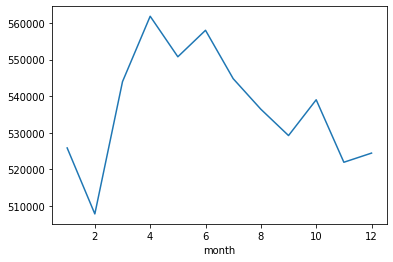

In [22]:
df.groupby('month').mean()['price'].plot()

<a id="ch6"></a>
## Scaling and train test split
<hr/>
Now we are ready to train a model and predict the required solution. There are 60+ predictive modelling algorithms to choose from. We must understand the type of problem and solution requirement to narrow down to a select few models which we can evaluate. Our problem is a mean squared error regression problem. We are also performing a category of machine learning which is called supervised learning as we are training our model with a given dataset.

## Here we split the data into train data, test data and validation data

In [24]:
# Features
X = df.drop('price',axis=1)

# Label
y = df['price']

# Split
# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [25]:
from sklearn.model_selection import train_test_split

# Assuming X is the feature matrix and y is the target vector
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Check the size of the subsets
print("Training set size:", len(X_train))
print("Validation set size:", len(X_val))
print("Testing set size:", len(X_test))

Training set size: 12967
Validation set size: 4323
Testing set size: 4323


In [26]:
X_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year
295,4,2.50,3360,22111,2.0,0,0,3,10,3360,0,1994,0,47.5951,-122.017,3150,11374,7,2014
13013,2,1.00,720,6400,1.0,0,0,4,6,720,0,1943,0,47.5286,-122.368,1030,6400,12,2014
6962,3,3.25,3690,7200,2.0,0,0,3,11,3690,0,2007,0,47.6815,-122.200,1880,7200,5,2014
4249,4,2.75,3190,5408,2.0,0,0,3,9,3190,0,2005,0,47.5903,-121.988,3160,5773,9,2014
8903,4,2.50,2860,5576,2.0,0,0,3,8,2860,0,2004,0,47.7450,-122.224,2290,10667,7,2014


In [27]:
X_val.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year
5825,5,2.25,2600,8075,1.5,0,0,4,8,2600,0,1969,0,47.2961,-122.188,2200,8800,8,2014
14594,5,2.50,2890,15891,2.0,0,0,3,9,2890,0,1990,0,47.5286,-122.160,2590,10556,4,2015
9249,3,2.50,4530,22873,2.0,0,2,5,8,3220,1310,1912,0,47.4567,-122.369,3100,18210,2,2015
5458,4,1.75,1820,8118,1.0,0,0,4,7,1080,740,1980,0,47.4104,-122.172,1810,8050,6,2014
13012,5,3.00,2970,7261,2.0,0,0,3,9,2970,0,1999,0,47.5994,-122.019,2970,8437,4,2015


In [28]:
X_test.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year
735,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,47.4388,-122.162,2390,7700,10,2014
2830,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,47.6784,-122.285,2370,6283,8,2014
4106,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,47.5646,-122.129,3710,9685,8,2014
16218,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,47.6995,-122.228,4050,14226,3,2015
19964,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,47.6647,-122.083,2250,4050,7,2014


In [29]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(12967, 19)
(4323, 19)
(12967,)
(4323,)


### Normalizing / scaling the data
We scale the feature data. To prevent data leakage from the test set, we only fit our scaler to the training set.

In [30]:
scaler = MinMaxScaler()

# fit and transfrom
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# everything has been scaled between 1 and 0
print('Max: ',X_train.max())
print('Min: ', X_train.min())

Max:  1.0
Min:  0.0


<a id="ch7"></a>
## Creating a model
***
We estimate the number of neurons (units) from our features. Ex: X_train.shape (15117, 19). The optimizer is asking how you want to perform this gradient descent. In this case we are using the Adam optimizer and the mean square error loss function.

In [31]:
model = Sequential()

# input layer
model.add(Dense(19,activation='relu'))

# hidden layers
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))

# output layer
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 19)                380       
                                                                 
 dense_1 (Dense)             (None, 19)                380       
                                                                 
 dense_2 (Dense)             (None, 19)                380       
                                                                 
 dense_3 (Dense)             (None, 19)                380       
                                                                 
 dense_4 (Dense)             (None, 1)                 20        
                                                                 
Total params: 1,540
Trainable params: 1,540
Non-trainable params: 0
_________________________________________________________________


<a id="ch8"></a>
## Training the model
***
Now that the model is ready, we can fit the model into the data.

Since the dataset is large, we are going to use batch_size. It is typical to use batches of the power of 2 (32, 64, 128, 256...). In this case we are using 128. The smaller the batch size, the longer is going to take.

In [34]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=400)

Epoch 1/400
102/102 [==============================] - 3s 9ms/step - loss: 423129677824.0000 - val_loss: 452945936384.0000
Epoch 2/400
102/102 [==============================] - 1s 6ms/step - loss: 422742720512.0000 - val_loss: 451608969216.0000
Epoch 3/400
102/102 [==============================] - 1s 6ms/step - loss: 417591001088.0000 - val_loss: 438971662336.0000
Epoch 4/400
102/102 [==============================] - 1s 9ms/step - loss: 388168613888.0000 - val_loss: 383262359552.0000
Epoch 5/400
102/102 [==============================] - 1s 8ms/step - loss: 299407015936.0000 - val_loss: 255331631104.0000
Epoch 6/400
102/102 [==============================] - 1s 8ms/step - loss: 167973453824.0000 - val_loss: 135778664448.0000
Epoch 7/400
102/102 [==============================] - 1s 6ms/step - loss: 105092980736.0000 - val_loss: 113841324032.0000
Epoch 8/400
102/102 [==============================] - 1s 7ms/step - loss: 99053985792.0000 - val_loss: 111740264448.0000
Epoch 9/400
102/1

### Training loss per epoch
* This plot shows the training loss per epoch.
* This plot helps us to see if there is overfitting in the model. In this case there is no overfitting because both lines go down at the same time. 

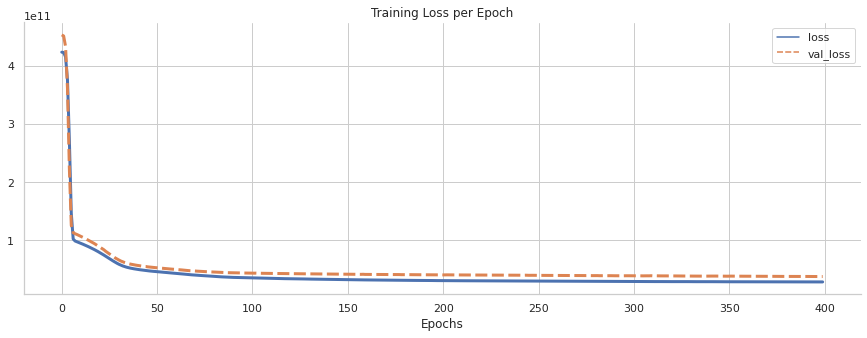

In [ ]:
losses = pd.DataFrame(model.history.history)

plt.figure(figsize=(15,5))
sns.lineplot(data=losses,lw=3)
plt.xlabel('Epochs')
plt.ylabel('')
plt.title('Training Loss per Epoch')
sns.despine()

<a id="ch9"></a>
## Evaluation on test data
---
### Regression Evaluation Metrics

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

### Predicting on brand new data
In this part we are giving the model the test set to get a list of predictions. Then we compare the correct values with the list of predictions. We use different metrics to compare the predictions, in this case we use MAE, MSE, RMSE and Variance Regression Score. 

Let us start by analyzing the MAE, which is \\$103,500. This means that our model is off on average about \\$100,000.

***Is that MAE good or bad?***

For that we must take into account our original data set and see what kind of values we have. For instance, the mean is 540,000, therefore the MEA is about 19% of the mean price. This is not a particularly good result.

To better understand this error, we can use the variance regression score, where the best possible score is 1.0 and lower values are worse. This tells you how much variance is being explain by your model. In our case we have 0.80 which is a normal result. 

In [ ]:
# predictions on the test set
predictions = model.predict(X_test)

print('MAE: ',mean_absolute_error(y_test,predictions))
print('MSE: ',mean_squared_error(y_test,predictions))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,predictions)))
print('Variance Regression Score: ',explained_variance_score(y_test,predictions))

print('\n\nDescriptive Statistics:\n',df['price'].describe())

136/136 [==============================] - 0s 1ms/step
MAE:  109706.99749161462
MSE:  37109349603.023605
RMSE:  192637.87167383157
Variance Regression Score:  0.7549010424911171


Descriptive Statistics:
 count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64


**Hyper parameter tunning**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
# from sklearn.datasets import make_regression
param_grid = {'hidden_layer_sizes': [(32,), (64,)],
              'activation': ['relu', 'tanh'],
              'learning_rate_init': [0.001, 0.01, 0.1],
              'max_iter': [100,500,700,800]}
reg = MLPRegressor(random_state=0)
grid_search = GridSearchCV(reg, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train.ravel())
print("Best hyperparameters: ", grid_search.best_params_)

Best hyperparameters:  {'activation': 'relu', 'hidden_layer_sizes': (64,), 'learning_rate_init': 0.1, 'max_iter': 800}


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
besthp=MLPRegressor(hidden_layer_sizes=(64,), activation='relu', learning_rate_init=0.1, max_iter=800, random_state=123)

In [ ]:
besthp.fit(X_train,y_train.ravel())

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(64,), learning_rate_init=0.1, max_iter=800,
             random_state=123)

In [ ]:
from sklearn.metrics import mean_absolute_error
test_pred = besthp.predict(X_test)
mse = mean_squared_error(y_test, test_pred)
mae = mean_absolute_error(y_test, test_pred)
print('Variance Regression Score: ',explained_variance_score(y_test,test_pred))
print("Test MSE: ", mse)
print("Test MAE: ", mae)

Variance Regression Score:  0.7773825614329757
Test MSE:  33667955049.10841
Test MAE:  108110.84618776712


In [ ]:
from sklearn.metrics import mean_absolute_error
test_pred = besthp.predict(X_test)
mse = mean_squared_error(y_test, test_pred)
mae = mean_absolute_error(y_test, test_pred)
print('Variance Regression Score: ',explained_variance_score(y_test,predictions))
print("Test MSE: ", mse)
print("Test MAE: ", mae)


Variance Regression Score:  0.7549010424911171
Test MSE:  33667955049.10841
Test MAE:  108110.84618776712


**Validation**

In [ ]:
X_val.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year
5825,5,2.25,2600,8075,1.5,0,0,4,8,2600,0,1969,0,47.2961,-122.188,2200,8800,8,2014
14594,5,2.50,2890,15891,2.0,0,0,3,9,2890,0,1990,0,47.5286,-122.160,2590,10556,4,2015
9249,3,2.50,4530,22873,2.0,0,2,5,8,3220,1310,1912,0,47.4567,-122.369,3100,18210,2,2015
5458,4,1.75,1820,8118,1.0,0,0,4,7,1080,740,1980,0,47.4104,-122.172,1810,8050,6,2014
13012,5,3.00,2970,7261,2.0,0,0,3,9,2970,0,1999,0,47.5994,-122.019,2970,8437,4,2015


In [ ]:
y_val.head()

5825      265000.0
14594     706000.0
9249     1115000.0
5458      264000.0
13012     726888.0
Name: price, dtype: float64

In [ ]:
X_val.shape

(4323, 19)

In [ ]:
y_val.shape

(4323,)

In [ ]:
val_pred=model.predict(X_val)

136/136 [==============================] - 0s 1ms/step


In [ ]:
val_pred=besthp.predict(X_val)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(


In [ ]:
val_pred.shape

(4323,)

In [ ]:
from sklearn.metrics import mean_absolute_error

mse = mean_squared_error(y_val, val_pred)
mae = mean_absolute_error(y_val, val_pred)

print("validation MSE: ", mse)
print("validation MAE: ", mae)

validation MSE:  2.5185862344809552e+20
validation MAE:  6966640492.085814


In [ ]:
val_pred

array([4.81093086e+09, 8.19188688e+09, 1.14917058e+10, ...,
       5.09386763e+09, 7.86566508e+09, 2.96254813e+09])

In [ ]:
val_pred1=pd.DataFrame(val_pred)

In [ ]:
val_pred1

,0
0,4.810931e+09
1,8.191887e+09
2,1.149171e+10
3,4.211200e+09
4,4.893093e+09
...,...
4318,3.932837e+09
4319,4.286559e+09
4320,5.093868e+09
4321,7.865665e+09


<a id="ch10"></a>
## Predicting on a brand new house
---
We are going to use the model to predict the price on a brand-new house. We are going to choose the first house of the data set and drop the price. single_house is going to have all the features that we need to predict the price. After that we need to reshape the variable and scale the features.

The original price is \\$221,900 and the model prediction is \\$280,904. 

** model**
train test model
 

In [ ]:
# fueatures of new house
single_house = df.drop('price',axis=1).iloc[0]
print(f'Features of new house:\n{single_house}')

# reshape the numpy array and scale the features
single_house = scaler.transform(single_house.values.reshape(-1, 19))

# run the model and get the price prediction
print('\nPrediction Price:',model.predict(single_house)[0,0])

# original price
print('\nOriginal Price:',df.iloc[0]['price'])

Features of new house:
bedrooms            3.0000
bathrooms           1.0000
sqft_living      1180.0000
sqft_lot         5650.0000
floors              1.0000
waterfront          0.0000
view                0.0000
condition           3.0000
grade               7.0000
sqft_above       1180.0000
sqft_basement       0.0000
yr_built         1955.0000
yr_renovated        0.0000
lat                47.5112
long             -122.2570
sqft_living15    1340.0000
sqft_lot15       5650.0000
month              10.0000
year             2014.0000
Name: 0, dtype: float64
1/1 [==============================] - 0s 39ms/step

Prediction Price: 280904.94

Original Price: 221900.0


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


## References
* [An Introduction to Statistical Learning with Applications in R](http://faculty.marshall.usc.edu/gareth-james/ISL/) - This book provides an introduction to statistical learning methods.
* [Python for Data Science and Machine Learning Bootcamp](https://www.udemy.com/course/python-for-data-science-and-machine-learning-bootcamp/) - Use Python for Data Science and Machine Learning.

**Thank you** for taking the time to read through my first exploration of a Kaggle dataset. I look forward to doing more!

If you have a question or feedback, do not hesitate to comment and if you like this kernel,<b><font color='green'> please upvote! </font></b>